# 4.2. Concise Implementation of Multilayer Perceptron with csv

MLP로 classification을 하는 예제를 csv파일을 불러와서 진행하는 예제입니다. 
본 예제의 csv파일은 jhu covid-19 csv파일을 임의로 training, validation으로 나누어 불러와 
일부 column들로 feature vector를 구성하여 input으로 하고, 마지막 column에 log를 취한 후 integer를 취한 값을 category로 하였습니다. 
이 category는 대소관계를 반영하기 때문에 cross entropy loss를 쓰는 것이 적절해 보이지는 않습니다. 또한, 데이터의 숫자가 매우 적고 category간에 숫자의 불균형도 심하기 때문에 쉽게 학습이 진행되기 어렵습니다. 이 실습은 단지 csv파일을 활용하는 예제를 보여주는 것이니 적절한 데이터와 target(label)을 csv파일로 구성하여 각자 실습을 진행하면 됩니다.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

colab을 사용하는 경우에는 google drive를 mount하도록 합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
root = '/content/drive/My Drive/hufs'

In [2]:
import pandas as pd


In [52]:
data_train = pd.read_csv('https://raw.githubusercontent.com/hufsbme/T10402101/master/ch4_multilayer_perceptron/sample_train.csv')
print(data_train.shape)
data_valid = pd.read_csv('https://raw.githubusercontent.com/hufsbme/T10402101/master/ch4_multilayer_perceptron/sample_valid.csv')
print(data_valid.shape)

(188, 105)
(40, 105)


In [53]:
data_valid[:5]

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,label
0,189,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,...,15,15,15,15,15,15,15,15,17,1
1,190,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,...,12,13,13,14,14,14,15,15,16,1
2,191,NaN,San Marino,43.9424,12.4578,0,0,0,0,0,...,476,488,501,513,513,538,538,553,563,2
3,192,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,...,11631,12772,13930,15102,16299,17522,18811,20077,21402,4
4,193,NaN,Senegal,14.4974,-14.4524,0,0,0,0,0,...,412,442,479,545,614,671,736,823,882,2


In [35]:
L= -28
features, labels, country = data_train.iloc[:,3:L], data_train.iloc[:,-1], data_train.iloc[:,[1,2]]
features_valid, labels_valid, country_valid = data_valid.iloc[:,3:L], data_valid.iloc[:,-1], data_valid.iloc[:,[1,2]]


In [36]:
features = (torch.tensor(features.values).float())
features_valid = (torch.tensor(features_valid.values).float())
labels = torch.tensor(labels).reshape(-1,)
labels_valid = torch.tensor(labels_valid).reshape(-1,)

print(features.shape)
print(labels.shape)
print(features_valid.shape)
print(labels_valid.shape)

fsize = (features.shape)[-1]
fsize


torch.Size([188, 74])
torch.Size([188])
torch.Size([40, 74])
torch.Size([40])


74

In [37]:
def get_csv_labels(labels):
    text_labels = ['위험수준 0','위험수준 1', '위험수준 2', '위험수준 3', '위험수준 4',
                   '위험수준 5', '위험수준 6']
    return [text_labels[int(i)] for i in labels]

In [43]:
# setting hyper-parameters
batch_size = 4
learning_rate = 0.001
num_epochs = 1000
num_workers = 0

# defining data_iter, linreg. model, loss, sgd
train_iter = DataLoader(dataset=TensorDataset(features,labels),batch_size=batch_size,shuffle=True) 
valid_iter = DataLoader(dataset=TensorDataset(features_valid,labels_valid),batch_size=batch_size,shuffle=False) 

In [44]:
# defining model
net = nn.Sequential(
    nn.Linear(fsize,128),
    nn.ReLU(),
    nn.Linear(128,256),
    nn.ReLU(),
    nn.Linear(256,7)
    )

# parameter initialization
torch.nn.init.normal_(net[0].weight,std=0.01)
torch.nn.init.normal_(net[2].weight,std=0.01)

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

# display model
net

Sequential(
  (0): Linear(in_features=74, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=7, bias=True)
)

## Model Training
model을 훈련하면서 train loss, train accuracy, test accuracy를 관찰합니다.
바로 위의 cell의 hyperparameter들을 바꿔가면서 결과를 비교해 봅니다.

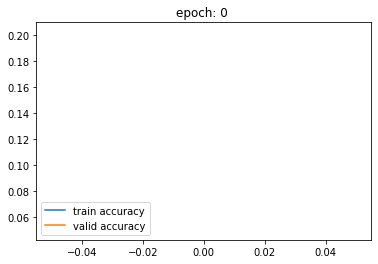

train loss:  15.09189427152593
train accuracy:  0.20212766528129578
valid accuracy:  0.05000000074505806


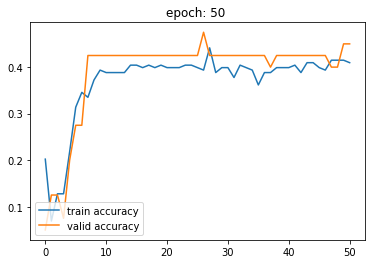

train loss:  1.5834835945291723
train accuracy:  0.4095744788646698
valid accuracy:  0.44999998807907104


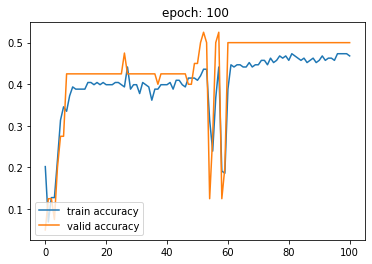

train loss:  1.3263534383570894
train accuracy:  0.4680851101875305
valid accuracy:  0.5


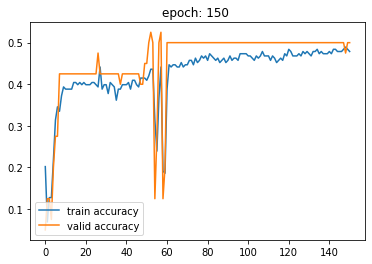

train loss:  1.2290946473466589
train accuracy:  0.478723406791687
valid accuracy:  0.5


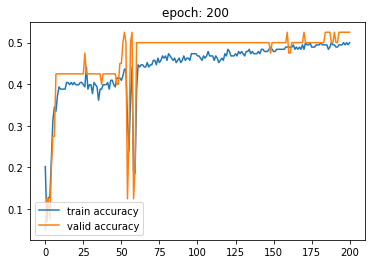

train loss:  1.1197720791431183
train accuracy:  0.5
valid accuracy:  0.5249999761581421


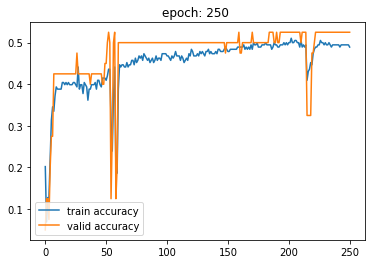

train loss:  1.1195686015676944
train accuracy:  0.4893617033958435
valid accuracy:  0.5249999761581421


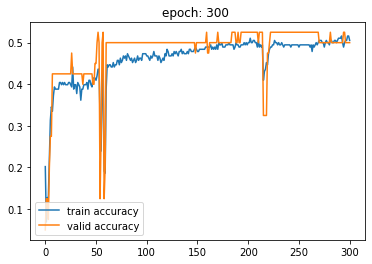

train loss:  1.079551615613572
train accuracy:  0.5053191781044006
valid accuracy:  0.5


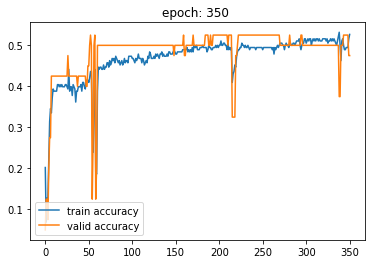

train loss:  1.0162363255277593
train accuracy:  0.5265957713127136
valid accuracy:  0.4749999940395355


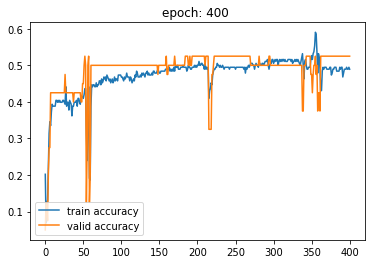

train loss:  1.0246178647305102
train accuracy:  0.4893617033958435
valid accuracy:  0.5249999761581421


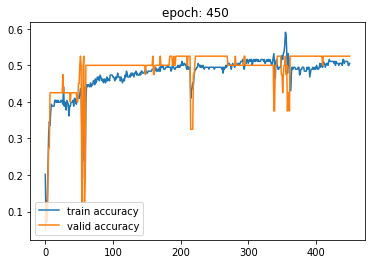

train loss:  1.0418311585771276
train accuracy:  0.5053191781044006
valid accuracy:  0.5249999761581421


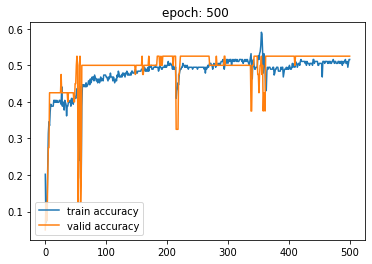

train loss:  1.0215583151959358
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


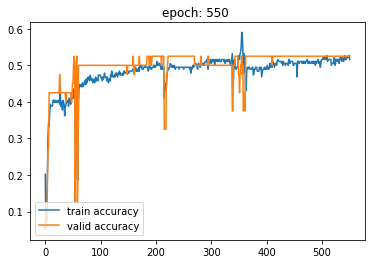

train loss:  1.0691686589667138
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


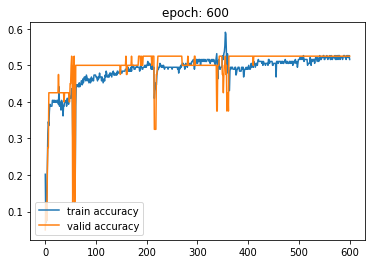

train loss:  1.05717581890999
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


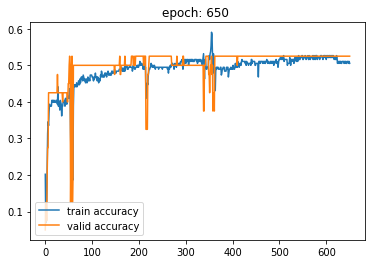

train loss:  1.0944549885201962
train accuracy:  0.5053191781044006
valid accuracy:  0.5249999761581421


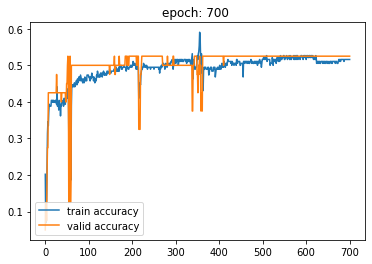

train loss:  1.0803703145777925
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


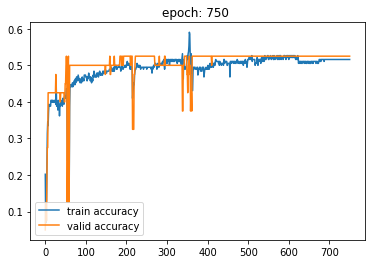

train loss:  1.0725458023395944
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


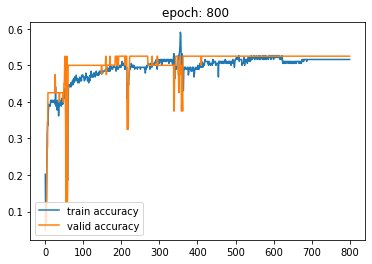

train loss:  1.064511887570645
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


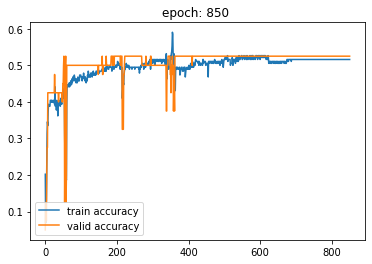

train loss:  1.0580454887227808
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


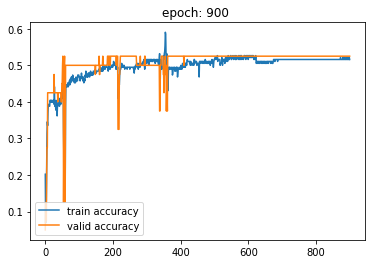

train loss:  1.054034375129862
train accuracy:  0.5159574747085571
valid accuracy:  0.5249999761581421


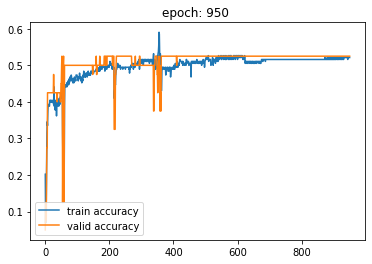

train loss:  1.0485074469383726
train accuracy:  0.521276593208313
valid accuracy:  0.5249999761581421


In [45]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid= np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    y_hat=net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()  

  loss_train = np.append(loss_train,l_epoch.detach().numpy()/i)
  accs_train = np.append(accs_train,correct/188.)

  correct = 0
  for X,y in valid_iter:
    y_hat = net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()
  accs_valid = np.append(accs_valid,correct/40.)

  if epoch%50 == 0:
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.pause(.0001)

    print('train loss: ',loss_train[-1])
    print('train accuracy: ',accs_train[-1])
    print('valid accuracy: ',accs_valid[-1])






country:  Tunisia
label:  ['위험수준 2']
predicted: ['위험수준 2'] with probability 0.420143


Text(0.5, 1.0, 'Tunisia')

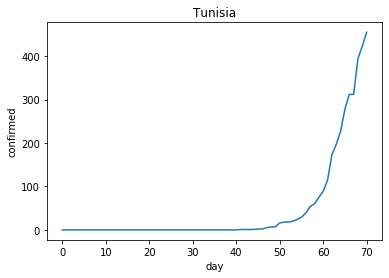

In [54]:
n=23
data_test = pd.read_csv('https://raw.githubusercontent.com/hufsbme/T10402101/master/ch4_multilayer_perceptron/sample_test.csv')
features_test, labels_test, country_test = data_test.iloc[:,3:L], data_test.iloc[:,-1], data_test.iloc[:,[1,2]]
X = (torch.tensor(features_test.values).float())
y1 = net(X[n])
print('country: ',country_test.iloc[n,1])
print('label: ',get_csv_labels([labels_test.iloc[n]]))
y1_softmax = y1.softmax(dim=0)
print('predicted: %s with probability %f'%(get_csv_labels([y1_softmax.argmax(dim=0)]), y1_softmax.max()))
plt.plot(X[n,3:])
plt.xlabel('day')
plt.ylabel('confirmed')
plt.title(country_test.iloc[n,1])